# S15: Genes newly identified by Oncodrive3D with literature support

In [4]:
import pandas as pd
import sys
sys.path.append('../../')
from global_variables import RUN

In [5]:
genes_o3d_all = pd.read_table(f"../../notebooks/0.genetables/results/human_mane_raw/{RUN}.genetable.tsv")
genes_o3d_all = genes_o3d_all[genes_o3d_all["o3d_qval"] < 0.01][["Gene", "CGC"]]
genes_o3d_all

,Gene,CGC
0,PIK3CA,1
1,RXRA,0
2,FGFR3,1
3,FBXW7,1
4,TP53,1
...,...,...
4496308,MED12,1
4496309,CTNNB1,1
4539226,TP53,1
4560686,HRAS,1


In [6]:
mine_df = pd.read_table("data/cancermine_collated.tsv")
mine_unfilter_df = pd.read_table("data/cancermine_unfiltered.tsv")
mine_df

/tmp/ipykernel_210431/3190598205.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mine_unfilter_df = pd.read_table("data/cancermine_unfiltered.tsv")


,matching_id,role,cancer_id,cancer_normalized,gene_hugo_id,gene_entrez_id,gene_normalized,citation_count
0,f952c5ad7bfa3a24e85e9c3326cdeb4f,Oncogene,DOID:1612,breast cancer,HGNC:3430,2064,ERBB2,1101
1,a8d75394a5b2f203cde783a9b9a48101,Oncogene,DOID:3908,lung non-small cell carcinoma,HGNC:3236,1956,EGFR,1024
2,acf2e46260fb18bb76c0a12976a81e58,Oncogene,DOID:1909,melanoma,HGNC:1097,673,BRAF,639
3,120622840a20614876f8610d58bc4ff4,Oncogene,DOID:769,neuroblastoma,HGNC:7559,4613,MYCN,577
4,42a6cc76076d3fb75ac50a800cde08af,Tumor_Suppressor,DOID:768,retinoblastoma,HGNC:9884,5925,RB1,545
...,...,...,...,...,...,...,...,...
35309,7b2fa235e769652251f687718f5de8e9,Driver,DOID:0001816,angiosarcoma,HGNC:132,60,ACTB,1
35310,99b0fde77ebe58d01e439f7480831277,Driver,DOID:0001816,angiosarcoma,HGNC:12682,7424,VEGFC,1
35311,31af8e218621360a332c30990e7b15ab,Driver,DOID:0001816,angiosarcoma,HGNC:12362,7248,TSC1,1
35312,b919094b871eb20d611e02eb2c4a0b37,Driver,DOID:0001816,angiosarcoma,HGNC:11998,7157,TP53,1


In [7]:
def get_counts(df, mine_df, mine_unfilter_df):
    
    cgc_pairs = df[df["CGC"] == 1]
    cgc_pairs_count = len(cgc_pairs)
    cgc_count = len(cgc_pairs.drop_duplicates())

    not_cgc_pairs = df[df["CGC"] != 1]

    cancermine_pairs = not_cgc_pairs[not_cgc_pairs.Gene.isin(mine_df.gene_normalized)]
    cancermine_pairs_count = len(cancermine_pairs)
    cancermine_count = len(cancermine_pairs.drop_duplicates())

    cancermine_unfiltered_pairs = not_cgc_pairs[
        (not_cgc_pairs.Gene.isin(mine_unfilter_df.gene_normalized)) & 
        (~not_cgc_pairs.Gene.isin(mine_df.gene_normalized))
        ]
    cancermine_unfiltered_pairs_count = len(cancermine_unfiltered_pairs)
    cancermine_unfiltered_count = len(cancermine_unfiltered_pairs.drop_duplicates())

    not_annotated_pairs = not_cgc_pairs[
        (~not_cgc_pairs.Gene.isin(mine_unfilter_df.gene_normalized)) & 
        (~not_cgc_pairs.Gene.isin(mine_df.gene_normalized))
        ]
    not_annotated_pairs_count = len(not_annotated_pairs)
    not_annotated_count = len(not_annotated_pairs.drop_duplicates())
    
    return [cgc_pairs_count, 
            cancermine_pairs_count, 
            cancermine_unfiltered_pairs_count, 
            not_annotated_pairs_count,
            cgc_count, 
            cancermine_count, 
            cancermine_unfiltered_count, 
            not_annotated_count]
    
    
[
    cgc_pairs_count,
    cancermine_pairs_count,
    cancermine_unfiltered_pairs_count,
    not_annotated_pairs_count,
    cgc_count,
    cancermine_count,
    cancermine_unfiltered_count,
    not_annotated_count,
] = get_counts(genes_o3d_all, mine_df, mine_unfilter_df)

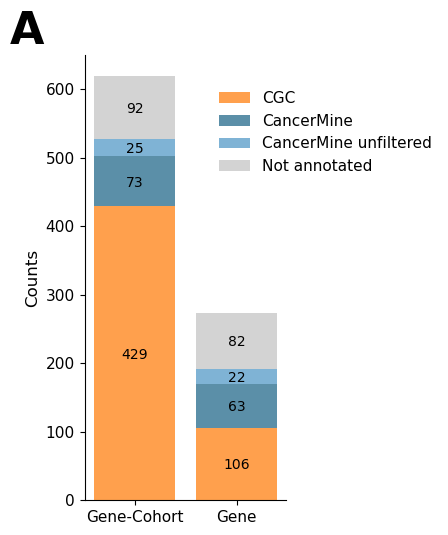

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create your counts
data = {
    "Category": ["CGC", "CancerMine", "CancerMine unfiltered", "Not annotated"],
    "Gene-Cohort": [cgc_pairs_count, cancermine_pairs_count, cancermine_unfiltered_pairs_count, not_annotated_pairs_count],
    "Gene": [cgc_count, cancermine_count, cancermine_unfiltered_count, not_annotated_count]
}

count_df = pd.DataFrame(data)

# Define fixed colors for each category
category_colors = {
    "CGC": "#FFA04D",               
    "CancerMine": "#5B8FA8",         
    "CancerMine unfiltered": "#7FB3D5", 
    "Not annotated": "lightgray"      
}

fig, ax = plt.subplots(figsize=(4, 5))

bottom_pairs = 0
bottom_genes = 0

for idx, row in count_df.iterrows():
    cat = row["Category"]
    color = category_colors[cat]

    # Plot the stacked bars
    bar1 = ax.bar("Gene-Cohort", row["Gene-Cohort"], bottom=bottom_pairs, color=color, label=cat)
    bar2 = ax.bar("Gene", row["Gene"], bottom=bottom_genes, color=color)
    
    # Add text inside each segment (centered)
    height_pairs = row["Gene-Cohort"]
    height_genes = row["Gene"]
    
    if height_pairs > 0:
        ax.text(
            x=0,  # "Gene-Cohort" is index 0
            y=(bottom_pairs + height_pairs / 2) - 2,
            s=str(height_pairs),
            ha='center', va='center', fontsize=10
        )
    if height_genes > 0:
        ax.text(
            x=1,  # "Gene" is index 1
            y=(bottom_genes + height_genes / 2) - 1.5,
            s=str(height_genes),
            ha='center', va='center', fontsize=10
        )
    
    # Update bottom for stacking
    bottom_pairs += height_pairs
    bottom_genes += height_genes

ax.set_ylabel('Counts', fontsize=12)
ax.tick_params(axis='both', labelsize=11)
ax.legend(frameon=False, bbox_to_anchor=(0.6, 0.95), fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.text(
    0,         
    1.06,         
    "A",
    transform=fig.transFigure,
    fontsize=32,   
    fontweight='bold',
    va='top',   
    ha='left'    
)

plt.tight_layout()
plt.savefig("plots/cancermine_annotations.png", dpi=900, bbox_inches='tight')
plt.show()

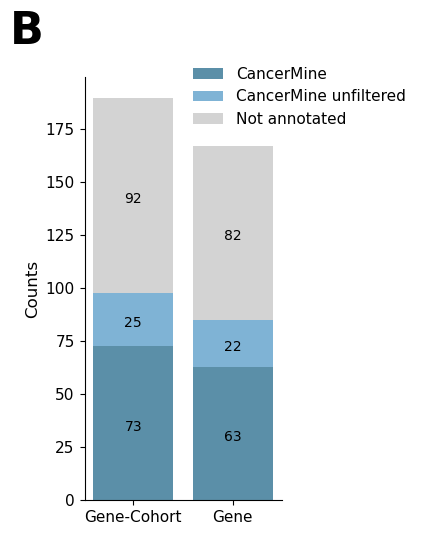

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create your counts
data = {
    "Category": ["CancerMine", "CancerMine unfiltered", "Not annotated"],
    "Gene-Cohort": [cancermine_pairs_count, cancermine_unfiltered_pairs_count, not_annotated_pairs_count],
    "Gene": [cancermine_count, cancermine_unfiltered_count, not_annotated_count]
}

count_df = pd.DataFrame(data)

# Define fixed colors for each category
category_colors = {
    "CGC": "#FFA04D",               
    "CancerMine": "#5B8FA8",         
    "CancerMine unfiltered": "#7FB3D5", 
    "Not annotated": "lightgray"      
}

fig, ax = plt.subplots(figsize=(3.7, 5))

bottom_pairs = 0
bottom_genes = 0

for idx, row in count_df.iterrows():
    cat = row["Category"]
    color = category_colors[cat]

    # Plot the stacked bars
    bar1 = ax.bar("Gene-Cohort", row["Gene-Cohort"], bottom=bottom_pairs, color=color, label=cat)
    bar2 = ax.bar("Gene", row["Gene"], bottom=bottom_genes, color=color)
    
    # Add text inside each segment (centered)
    height_pairs = row["Gene-Cohort"]
    height_genes = row["Gene"]
    
    if height_pairs > 0:
        ax.text(
            x=0,  # "Gene-Cohort" is index 0
            y=(bottom_pairs + height_pairs / 2) - 2,
            s=str(height_pairs),
            ha='center', va='center', fontsize=10
        )
    if height_genes > 0:
        ax.text(
            x=1,  # "Gene" is index 1
            y=(bottom_genes + height_genes / 2) - 1.5,
            s=str(height_genes),
            ha='center', va='center', fontsize=10
        )
    
    # Update bottom for stacking
    bottom_pairs += height_pairs
    bottom_genes += height_genes

ax.set_ylabel('Counts', fontsize=12)
ax.tick_params(axis='both', labelsize=11)
ax.legend(frameon=False, bbox_to_anchor=(0.48, 0.85), fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.text(
    0,         
    1.06,         
    "B",
    transform=fig.transFigure,
    fontsize=32,   
    fontweight='bold',
    va='top',   
    ha='left'    
)

plt.tight_layout()
plt.savefig("plots/potential_new_drivers_cancermine_annotations.png", dpi=900, bbox_inches='tight')
plt.show()